In [1]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from PIL import Image

from network.mynetwork_uu import Unet
from loss.loss import CLIPLoss

import clip

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

cliploss = CLIPLoss(device)

In [3]:
topil = transforms.ToPILImage()
topic = transforms.ToTensor()

In [4]:
cos = torch.nn.CosineSimilarity()

In [5]:
pic = Image.open("../source_pic/face2.jpeg")
pic = topic(pic).unsqueeze(0).to(device)

In [6]:
target = cliploss.get_image_features(pic)
targetq = cliploss.get_image_features(pic)



In [7]:
def do(size):

    points = cliploss.random_patch_points(pic.shape, 64, size)
    patches = cliploss.generate_patches(pic,points,size)
    targets = cliploss.get_image_features(patches)
    targets = targets.mean(axis=0, keepdims=True)
    res = cos(targets,target).item()
    return res

In [8]:
li = []
for i in range(32,500+1):
    new = do(i)
    li.append(new)
    print(new)

0.99609375
0.99609375
0.99609375
0.99609375
0.99560546875
0.9951171875
0.99560546875
0.99560546875
0.99560546875
0.9951171875
0.99462890625
0.99462890625
0.994140625
0.99462890625
0.994140625
0.994140625
0.994140625
0.994140625
0.994140625
0.99365234375
0.9931640625
0.99365234375
0.99267578125
0.99169921875
0.9921875
0.99267578125
0.9921875
0.99169921875
0.99169921875
0.9912109375
0.99072265625
0.990234375
0.9912109375
0.99072265625
0.98974609375
0.98974609375
0.98974609375
0.9892578125
0.9892578125
0.9892578125
0.9892578125
0.98876953125
0.98974609375
0.98876953125
0.98876953125
0.98828125
0.98779296875
0.98828125
0.98876953125
0.98779296875
0.98828125
0.98779296875
0.98681640625
0.98876953125
0.98876953125
0.98779296875
0.98828125
0.98828125
0.98876953125
0.98876953125
0.98828125
0.98828125
0.98876953125
0.9873046875
0.98828125
0.98779296875
0.98779296875
0.9873046875
0.98779296875
0.98828125
0.986328125
0.9873046875
0.98779296875
0.986328125
0.98779296875
0.98681640625
0.9873046875


In [9]:
x = [i for i in range(32,500+1)]

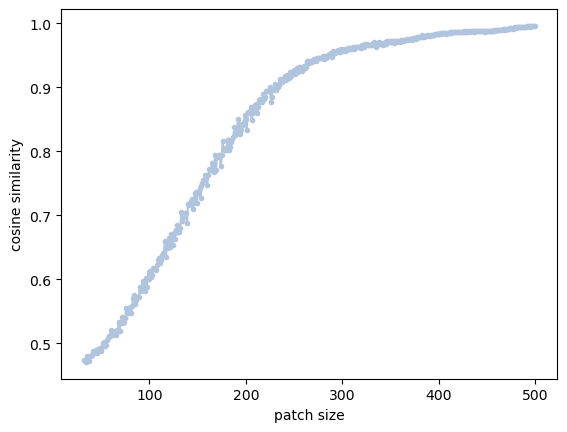

In [10]:
import matplotlib.pyplot as plt

fig,_ = plt.subplots()
plt.plot(x,li,color="lightsteelblue",marker=".")
plt.xlabel('patch size')
plt.ylabel('cosine similarity')
fig.savefig('../graph/patch_similar.eps',dpi=600,format='eps')

